<a href="https://colab.research.google.com/github/pipe-felipe/tcc_knn/blob/main/tcc_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
from sklearn import preprocessing, model_selection, neighbors
from sklearn.preprocessing import StandardScaler

In [155]:
from mlxtend.plotting import plot_decision_regions

In [156]:
from google.colab import drive
import pandas

In [157]:
drive.mount('/content/drive')

data_customer_path = "/content/drive/MyDrive/TG/KNN"
customers = "customer.csv"
data_set = f"{data_customer_path}/{customers}"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [158]:
df = pd.read_csv(data_set)
df.drop(['_id', '_class', 'transactionMessage', 'name', 'allTransactions'], 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [159]:
df.tail()

,email,document,creditCard.flag,creditCard.holderName,creditCard.number,creditCard.validThru,creditCard.cvv,address.street,address.number,address.city,address.state,address.country,address.zipCode,age,transactionValue,transactionCount,transactionStatus
43,Heather.Ortiz16@gmail.com,88414741576,VISA,Charles Runolfsdottir,46448174,2027-20,791,Hettinger Inlet,224,Port Vivienne,Sao Paulo,Brazil,591445,27,279.37,1,APPROVE
44,Yolanda_Doyle@yahoo.com,35724727250,VISA,Adrienne Adams,99062891,2027-20,9058,Lloyd Wells,428,Lilianeview,Sao Paulo,Brazil,387761,24,1339.67,1,APPROVE
45,ladrao@gmail.com,32665998856,VISA,Tre Cool,6545648778,2022-20,548,Rua rua rua,123,Itatiba,São Paulo,Brazil,13256987,11,982.92,17,REPROVE
46,Chyna69@gmail.com,24275141520,VISA,Dale Sawayn,25729910,2027-20,2049,Leanne Branch,27,Anastaciobury,Sao Paulo,Brazil,799763,22,993.62,1,APPROVE
47,Kelton50@yahoo.com,24714296299,VISA,Gerard Way,14855755,2027-20,557,Craig Extension,397,Peoria,Sao Paulo,Brazil,807721,25,1336.28,1,APPROVE


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   email                  48 non-null     object 
 1   document               48 non-null     int64  
 2   creditCard.flag        48 non-null     object 
 3   creditCard.holderName  48 non-null     object 
 4   creditCard.number      48 non-null     int64  
 5   creditCard.validThru   48 non-null     object 
 6   creditCard.cvv         48 non-null     int64  
 7   address.street         48 non-null     object 
 8   address.number         48 non-null     int64  
 9   address.city           48 non-null     object 
 10  address.state          48 non-null     object 
 11  address.country        48 non-null     object 
 12  address.zipCode        48 non-null     int64  
 13  age                    48 non-null     int64  
 14  transactionValue       48 non-null     float64
 15  transact

In [161]:
df.describe()

,document,creditCard.number,creditCard.cvv,address.number,address.zipCode,age,transactionValue,transactionCount
count,4.800000e+01,4.800000e+01,48.000000,48.000000,4.800000e+01,48.000000,48.000000,48.000000
mean,5.290134e+10,1.814557e+08,4632.395833,404.166667,7.115548e+05,26.750000,672.154792,1.625000
std,2.319015e+10,9.386218e+08,3329.211975,277.298237,1.871972e+06,3.634937,419.789723,2.863007
min,6.184534e+09,7.104570e+05,226.000000,12.000000,2.186000e+03,11.000000,45.750000,1.000000
25%,3.519644e+10,2.109390e+07,1275.500000,173.250000,1.908768e+05,24.000000,330.150000,1.000000
50%,4.855001e+10,3.822118e+07,4160.500000,386.000000,4.703525e+05,27.000000,675.415000,1.000000
75%,6.645561e+10,7.426653e+07,8027.500000,580.750000,7.152630e+05,29.250000,1006.590000,1.000000
max,9.653734e+10,6.545649e+09,9422.000000,968.000000,1.325699e+07,32.000000,1339.670000,17.000000


In [162]:
df.describe(include=['object'])

,email,creditCard.flag,creditCard.holderName,creditCard.validThru,address.street,address.city,address.state,address.country,transactionStatus
count,48,48,48,48,48,48,48,48,48
unique,48,1,48,2,48,48,2,1,2
top,Karlee.Beatty@hotmail.com,VISA,Christina Towne DDS,2027-20,Powlowski Manor,Rachelland,Sao Paulo,Brazil,APPROVE
freq,1,48,1,47,1,1,47,48,38


In [163]:
transaction_status_result = {'REPROVE': 1,'APPROVE': 0}
df.transactionStatus = [transaction_status_result[result] for result in df.transactionStatus]
df.tail()

,email,document,creditCard.flag,creditCard.holderName,creditCard.number,creditCard.validThru,creditCard.cvv,address.street,address.number,address.city,address.state,address.country,address.zipCode,age,transactionValue,transactionCount,transactionStatus
43,Heather.Ortiz16@gmail.com,88414741576,VISA,Charles Runolfsdottir,46448174,2027-20,791,Hettinger Inlet,224,Port Vivienne,Sao Paulo,Brazil,591445,27,279.37,1,0
44,Yolanda_Doyle@yahoo.com,35724727250,VISA,Adrienne Adams,99062891,2027-20,9058,Lloyd Wells,428,Lilianeview,Sao Paulo,Brazil,387761,24,1339.67,1,0
45,ladrao@gmail.com,32665998856,VISA,Tre Cool,6545648778,2022-20,548,Rua rua rua,123,Itatiba,São Paulo,Brazil,13256987,11,982.92,17,1
46,Chyna69@gmail.com,24275141520,VISA,Dale Sawayn,25729910,2027-20,2049,Leanne Branch,27,Anastaciobury,Sao Paulo,Brazil,799763,22,993.62,1,0
47,Kelton50@yahoo.com,24714296299,VISA,Gerard Way,14855755,2027-20,557,Craig Extension,397,Peoria,Sao Paulo,Brazil,807721,25,1336.28,1,0


In [164]:
df['transactionStatus'].describe()

count    48.000000
mean      0.208333
std       0.410414
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: transactionStatus, dtype: float64

In [165]:
df['transactionStatus'].unique()

array([0, 1])

In [166]:
df_dummy = pd.get_dummies(df)

In [167]:
df_dummy.head()

,document,creditCard.number,creditCard.cvv,address.number,address.zipCode,age,transactionValue,transactionCount,transactionStatus,email_Abagail80@hotmail.com,...,address.city_Sanfordfurt,address.city_Shanahanview,address.city_South Yazminside,address.city_Taylorsville,address.city_Town 'n' Country,address.city_West Aldaport,address.city_West Benjamin,address.state_Sao Paulo,address.state_São Paulo,address.country_Brazil
0,40479685363,35004857,8981,436,455905,28,750.27,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1,31205742280,19623597,1489,434,706592,31,330.45,13,0,0,...,0,0,0,0,0,0,0,1,0,1
2,51313018236,39575841,828,573,18713,29,45.75,3,0,0,...,0,0,0,0,0,0,0,1,0,1
3,78541269337,36866524,719,18,612604,32,861.53,1,0,0,...,0,0,0,0,0,0,0,1,0,1
4,63944888014,8319526,8595,702,990526,30,848.84,1,0,0,...,0,0,0,0,0,0,0,1,0,1


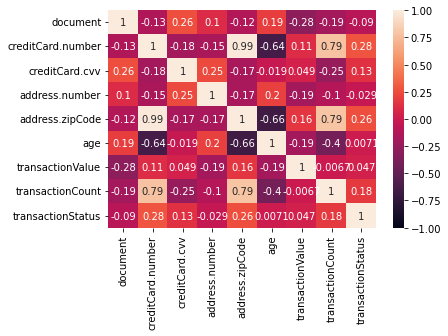

In [168]:
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

# Isso quer dizer que a variável transactionCount explica 0.18% a variável transactionStatus